Using backend: tensorflow.compat.v1



Instructions for updating:
non-resource variables are not supported in the long term

heat_1d_boundary_sin_exact: Average time with 25 tries: 0.0001 seconds
finite_difference_crank_nicolson: Average time with 25 tries: 0.0493 seconds


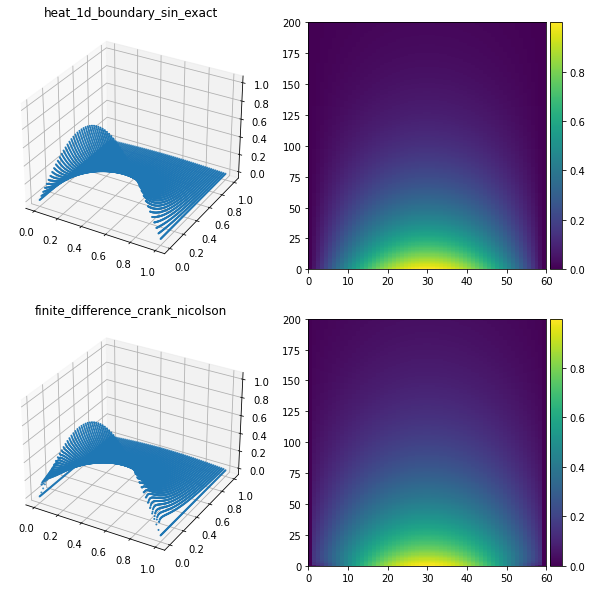

In [1]:
from heat_pinn import *

TIMER_REPEAT_TIMES = 25

# Generate constants throughout this app!!
const_params = PinnConstParam()
solve_analytical_and_numerical(const_params)
plotter = Plotter(2, 2)
plot_analytical_and_numerical(plotter, const_params)


# Test 1: Default parameters from DeepXde

/Users/radian/miniforge3/envs/mlp/lib/python3.8/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/Users/radian/miniforge3/envs/mlp/lib/python3.8/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/Users/radian/miniforge3/envs/mlp/lib/python3.8/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "


train_bc_points shape (240, 2)
train_points shape (2780, 2)
train_next_batch shape (3020, 2)


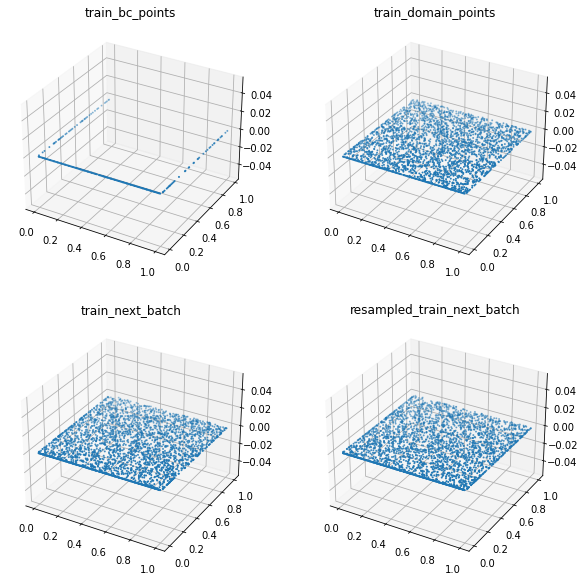

In [2]:
# Create model and plot training data
test_params = PinnTestParam()
geomtime_data, model = create_model(const_params, test_params)
plot_train_data(geomtime_data)

In [ ]:
# Train model and output results
losshistory, train_state = train_model(model)
predict_and_output_report(const_params, model, losshistory, train_state, test_params=test_params)


# Test 2: Reduce hidden layers and size to break solution

In [ ]:
test_params = PinnTestParam()
test_params.nn_hidden_layer_num = 1
test_params.nn_hidden_layer_size = 5

geomtime_data, model = create_model(const_params, test_params)

In [ ]:
# Train model and output results
losshistory, train_state = train_model(model)
predict_and_output_report(const_params, model, losshistory, train_state, test_params=test_params)


# Test 3: Reduce boundary points to break solution

In [ ]:
test_params = PinnTestParam()
test_params.d_num_boundary = 3
test_params.d_num_initial = 3

geomtime_data, model = create_model(const_params, test_params)
plot_train_data(geomtime_data)

In [ ]:
# Train model and output results
losshistory, train_state = train_model(model)
predict_and_output_report(const_params, model, losshistory, train_state, test_params=test_params)

# Test 4: Reduce domain to break solution

In [ ]:
test_params = PinnTestParam()
test_params.d_num_domain = 50

geomtime_data, model = create_model(const_params, test_params)
plot_train_data(geomtime_data)

In [ ]:
# Train model and output results
losshistory, train_state = train_model(model)
predict_and_output_report(const_params, model, losshistory, train_state, test_params=test_params)


# Test 5: Reduce train data (domain and bc) to break solution

/Users/radian/miniforge3/envs/mlp/lib/python3.8/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+7=7. 
  warnings.warn("The balance properties of Sobol' points require "
/Users/radian/miniforge3/envs/mlp/lib/python3.8/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+12=12. 
  warnings.warn("The balance properties of Sobol' points require "


train_bc_points shape (20, 2)
train_points shape (25, 2)
train_next_batch shape (45, 2)


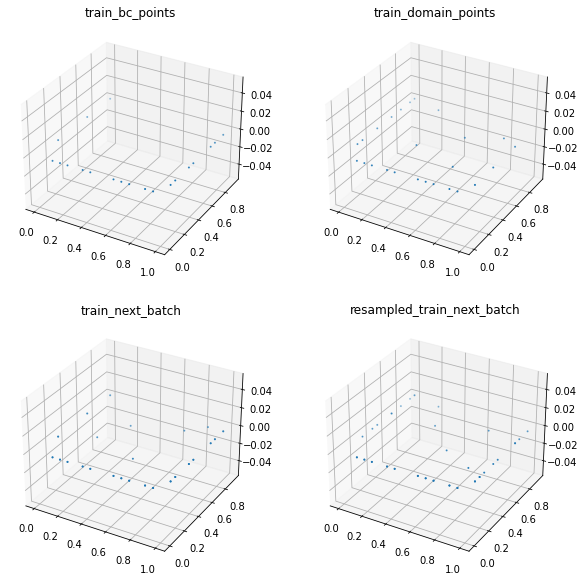

In [3]:
test_params = PinnTestParam()
test_params.d_num_domain = 5
test_params.d_num_boundary = 10
test_params.d_num_initial = 10

geomtime_data, model = create_model(const_params, test_params)
plot_train_data(geomtime_data)

Compiling model...
Building feed-forward neural network...
'build' took 0.025391 s

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

'compile' took 0.120396 s

Initializing variables...
Training model...



/Users/radian/miniforge3/envs/mlp/lib/python3.8/site-packages/keras/legacy_tf_layers/core.py:236: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/radian/miniforge3/envs/mlp/lib/python3.8/site-packages/keras/engine/base_layer_v1.py:1676: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-13 00:06:54.075424: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-13 00:06:54.075536: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> phys

Step      Train loss                        Test loss                         Test metric
0         [2.70e-01, 6.07e-02, 6.17e-01]    [2.56e-01, 6.07e-02, 6.17e-01]    []  


2021-12-13 00:06:54.425946: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1000      [2.11e-03, 1.36e-03, 2.10e-03]    [2.60e-02, 1.36e-03, 2.10e-03]    []  
2000      [6.67e-04, 1.18e-04, 1.04e-04]    [3.65e-02, 1.18e-04, 1.04e-04]    []  
3000      [1.98e-04, 3.41e-05, 5.81e-05]    [2.71e-02, 3.41e-05, 5.81e-05]    []  
4000      [4.65e-05, 1.17e-05, 4.75e-05]    [1.84e-02, 1.17e-05, 4.75e-05]    []  
5000      [1.63e-05, 7.31e-06, 3.59e-05]    [1.26e-02, 7.31e-06, 3.59e-05]    []  
6000      [8.82e-05, 4.80e-06, 4.31e-05]    [7.84e-03, 4.80e-06, 4.31e-05]    []  
7000      [9.36e-06, 4.28e-06, 1.97e-05]    [5.63e-03, 4.28e-06, 1.97e-05]    []  
8000      [4.09e-06, 3.80e-06, 1.34e-05]    [4.08e-03, 3.80e-06, 1.34e-05]    []  
9000      [2.66e-06, 3.43e-06, 9.24e-06]    [3.21e-03, 3.43e-06, 9.24e-06]    []  
10000     [1.90e-06, 3.03e-06, 6.71e-06]    [2.80e-03, 3.03e-06, 6.71e-06]    []  
11000     [2.27e-05, 2.49e-06, 7.49e-06]    [2.75e-03, 2.49e-06, 7.49e-06]    []  
12000     [1.04e-06, 2.43e-06, 3.69e-06]    [2.80e-03, 2.43e-06, 3.69e-06]    []  
1300

2021-12-13 00:09:09.788958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-13 00:09:09.803938: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-13 00:09:09.806776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-13 00:09:09.895926: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-13 00:09:09.905492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Optimization terminated with:
  Message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  Objective function value: 0.000003
  Number of iterations: 3
  Number of functions evaluations: 43
20043     [4.94e-07, 1.40e-06, 7.18e-07]    [5.47e-03, 1.40e-06, 7.18e-07]    []  

Best model at step 20043:
  train loss: 2.61e-06
  test loss: 5.48e-03
  test metric: []

'train' took 0.680650 s

Training time: Elapsed time: 136.4088 seconds
PINN prediction: Average time with 25 tries: 0.0029 seconds


2021-12-13 00:09:10.438626: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-13 00:09:10.493869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


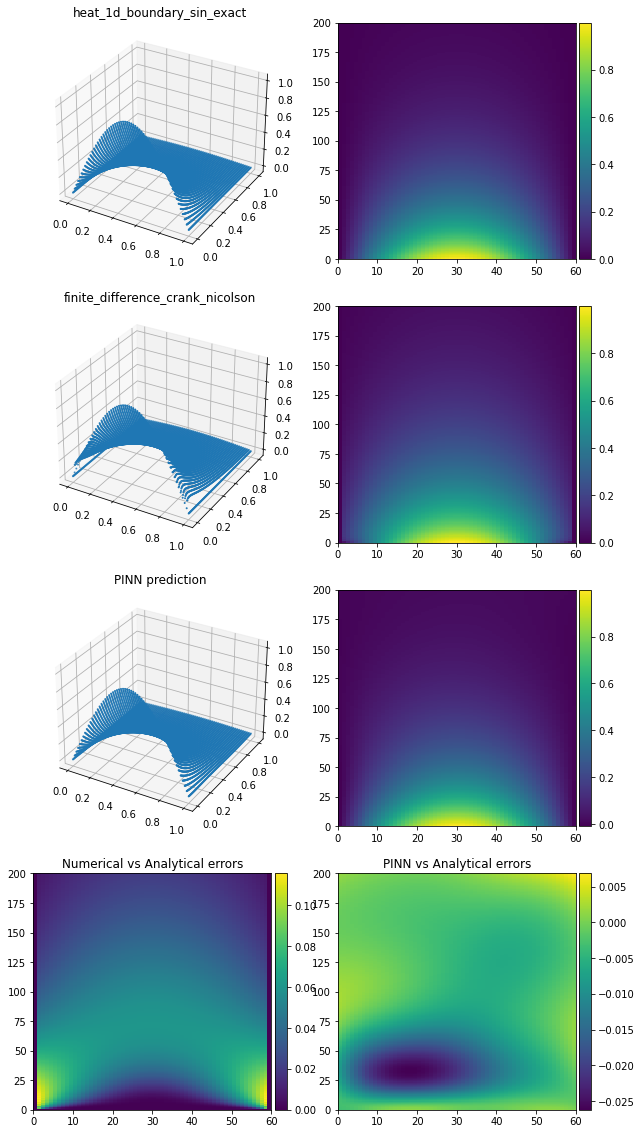

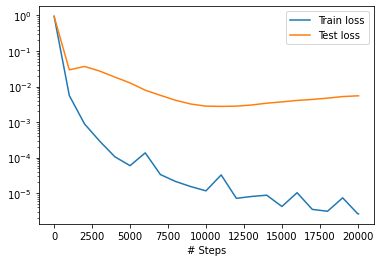

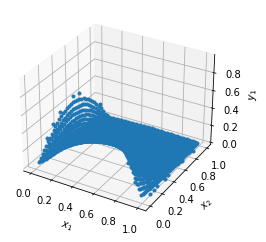

IGNORE ^^^ PDE test data SOLUTION PLOT!!! ^^^
---Performance measured wrt analytical solution---
Mean residual: 0.33880842
L2 relative error: 0.032855827831225835
--- Report ---
Mean absolute error:  0.0057463060060372545
Mean squared error:  6.819628511556582e-05
Max error:  0.026207463857144675
Pinn Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 60
test_t_dim: 200
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson

Pinn Test Param: 
d_num_domain: 5
d_num_boundary: 10
d_num_initial: 10
nn_hidden_layer_size: 20
nn_hidden_layer_num: 3



2021-12-13 00:09:11.574922: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [8]:
# Train model and output results
losshistory, train_state = train_model(model)
predict_and_output_report(const_params, model, losshistory, train_state, test_params=test_params)
